In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/energy_types.csv')

df.dropna(inplace=True)
df.sort_values(['country_name','type'],inplace=True)
df.reset_index(drop=True, inplace=True)

fr = df[ df.country_name == 'France' ] # separando dados da França
de = df[ df.country_name == 'Germany' ] # separando dados da Alemanha

df.head()

,country,country_name,type,level,2016,2017,2018
0,AL,Albania,Conventional thermal,Level 1,0.0,0.000,0.000
1,AL,Albania,Geothermal,Level 1,0.0,0.000,0.000
2,AL,Albania,Hydro,Level 1,7136.0,4496.607,8596.537
3,AL,Albania,Nuclear,Level 1,0.0,0.000,0.000
4,AL,Albania,Other,Level 1,0.0,0.000,0.000


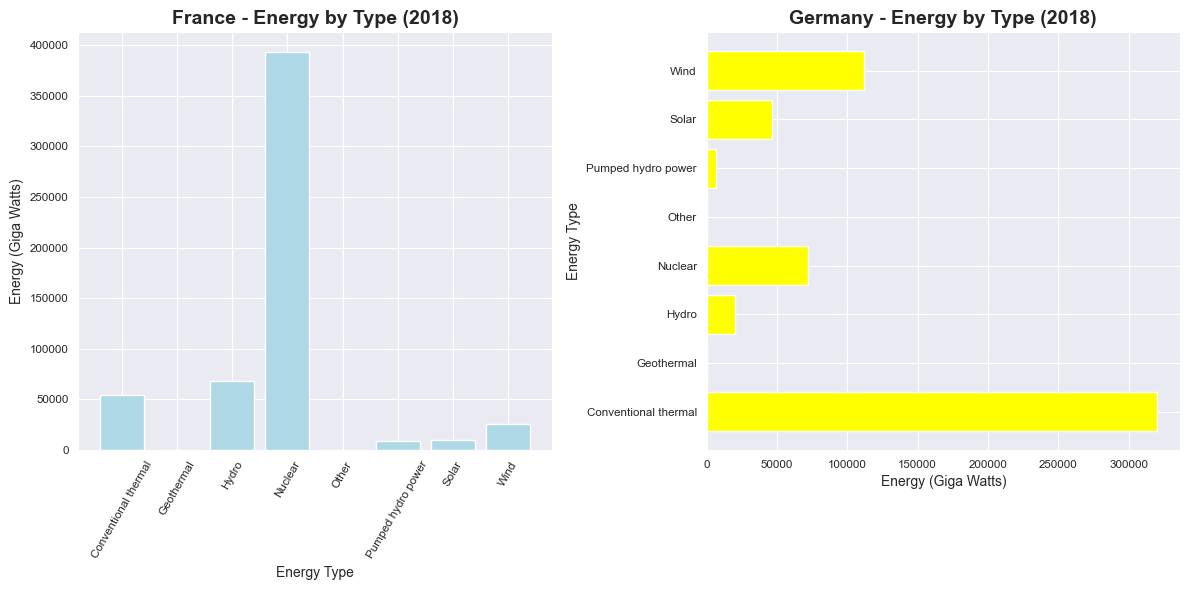

In [57]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.bar(fr['type'], fr['2018'], color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.subplot(1,2,2)

plt.barh(de['type'], de['2018'], color='yellow')
plt.ylabel("Energy Type")
plt.xlabel("Energy (Giga Watts)")
plt.title("Germany - Energy by Type (2018)", fontsize=14, weight='bold')

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.show()

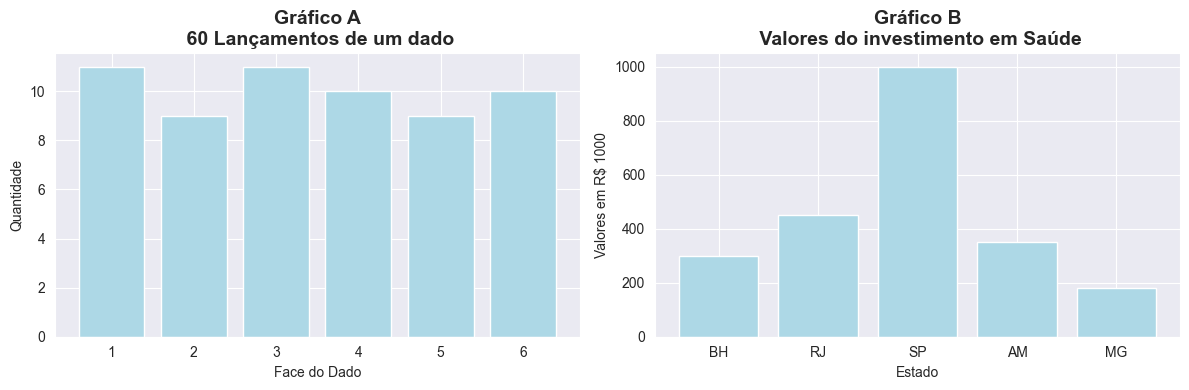

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar([1,2,3,4,5,6],[11,9,11,10,9,10], color='lightblue')
plt.title('Gráfico A\n 60 Lançamentos de um dado', fontsize=14, weight='bold')
plt.xlabel('Face do Dado')
plt.ylabel('Quantidade')

plt.subplot(1,2,2)
plt.bar(['BH','RJ','SP','AM','MG'],[300,450,1000,350,180], color='lightblue')
plt.title('Gráfico B\n Valores do investimento em Saúde', fontsize=14, weight='bold')
plt.xlabel('Estado')
plt.ylabel('Valores em R$ 1000')

plt.tight_layout()
plt.show()

In [59]:
def autolabel(rects,ax,s=10,w='normal',c='k'):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=s, weight=w, color=c)

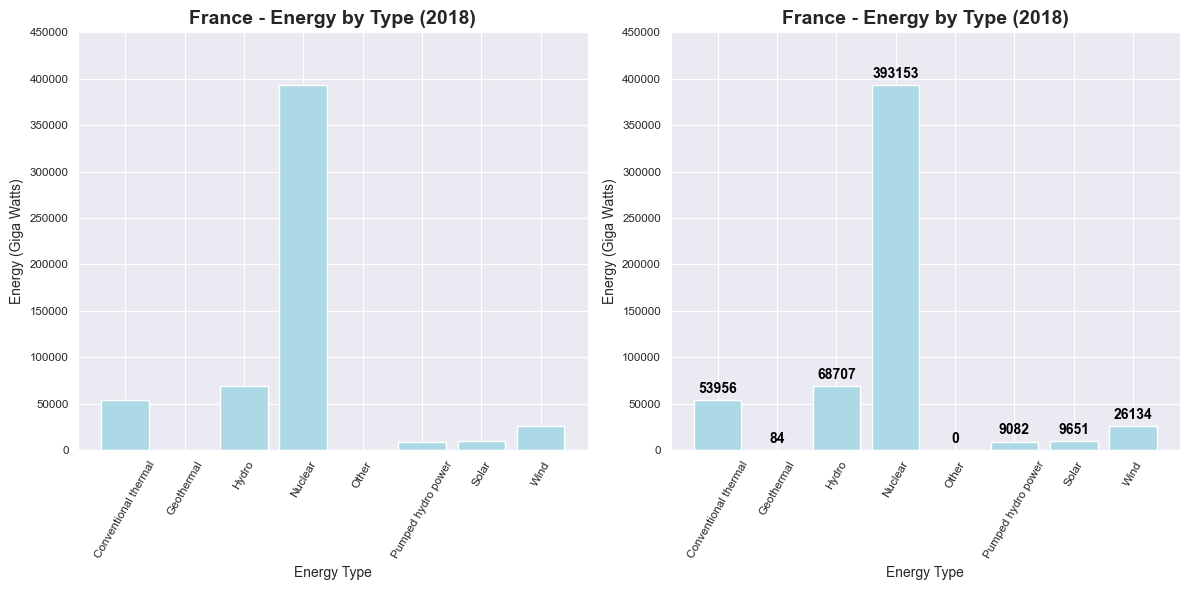

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.bar(fr['type'], fr['2018'], color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.ylim([0,450000])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.subplot(1,2,2)

rects1 = plt.bar(fr['type'], fr['2018'], color='lightblue')
autolabel(rects1, plt, 10, w='bold')

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.ylim([0,450000])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.show()

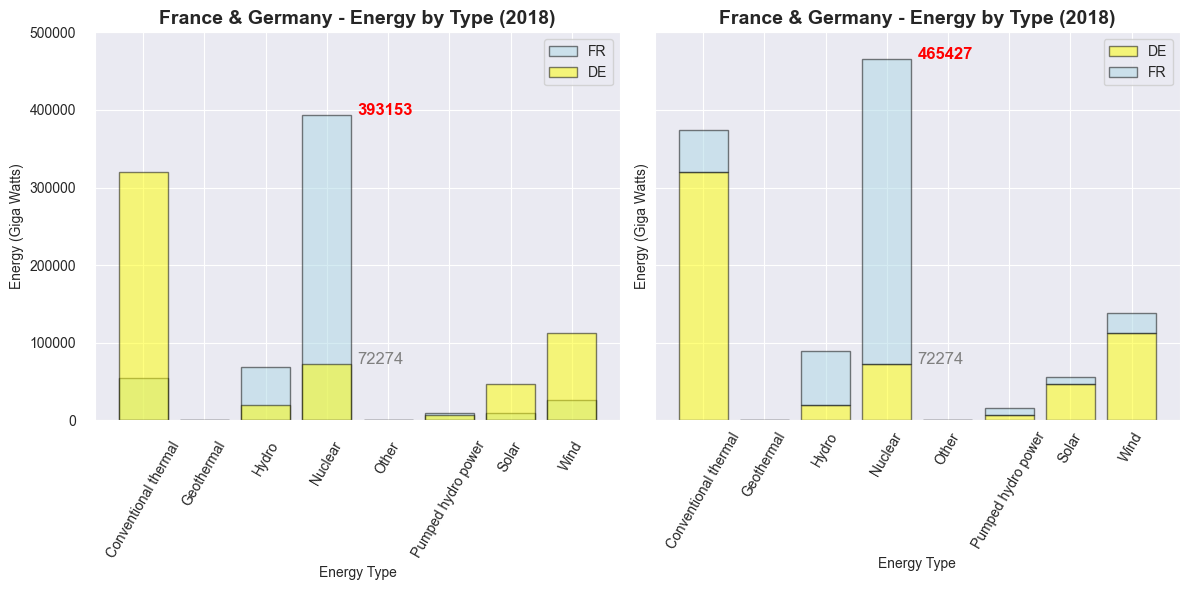

In [61]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

ax[0].bar(fr['type'], fr['2018'], color='lightblue', label='FR',alpha=0.5,edgecolor='k')
ax[0].bar(de['type'], de['2018'], color='yellow', label='DE',alpha=0.5,edgecolor='k')

ax[0].set_xlabel("Energy Type")
ax[0].set_ylabel("Energy (Giga Watts)")
ax[0].set_title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')
ax[0].set_ylim([0,500000])

ax[0].tick_params(axis='x', rotation=60, size=10)
ax[0].tick_params(axis='y', size=10)
ax[0].legend()

ax[0].text(3.5, de[de['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(de[de['type'] == 'Nuclear']['2018'].values[0]), color='grey', fontsize=12)
ax[0].text(3.5, fr[fr['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(fr[fr['type'] == 'Nuclear']['2018'].values[0]), color='r', weight='bold', fontsize=12)

ax[1].bar(de['type'], de['2018'], color='yellow', label='DE',alpha=0.5,edgecolor='k')
ax[1].bar(fr['type'], fr['2018'], bottom=de['2018'], color='lightblue', label='FR',alpha=0.5,edgecolor='k')
ax[1].set_xlabel("Energy Type")
ax[1].set_ylabel("Energy (Giga Watts)")
ax[1].set_title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')

ax[1].text(3.5, de[de['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(de[de['type'] == 'Nuclear']['2018'].values[0]), color='grey', fontsize=12)
ax[1].text(3.5, fr[fr['type'] == 'Nuclear']['2018'].values[0] + de[de['type'] == 'Nuclear']['2018'].values[0],
           '{:.0f}'.format(fr[fr['type'] == 'Nuclear']['2018'].values[0] + + de[de['type'] == 'Nuclear']['2018'].values[0]),
           color='r', weight='bold', fontsize=12)

ax[1].tick_params(axis='x', rotation=60)
ax[1].legend()

plt.tight_layout()

plt.show()

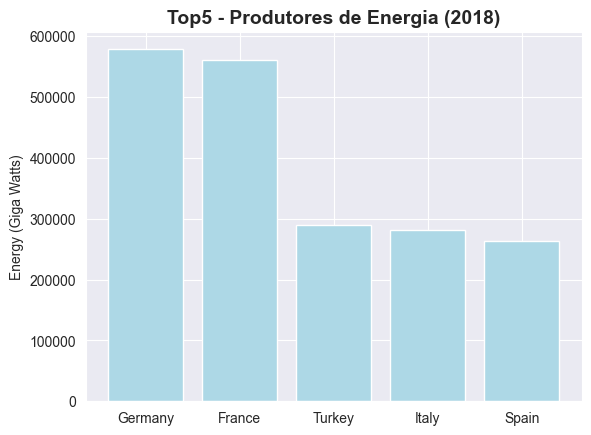

In [79]:
plt.bar(df.groupby('country_name')['2018'].sum().nlargest(5).keys(), df.groupby('country_name')['2018'].sum().nlargest(5), color='lightblue')
plt.title('Top5 - Produtores de Energia (2018)', fontsize=14, weight='bold')
plt.ylabel("Energy (Giga Watts)")
plt.show()

top5 = df.groupby('country_name')['2018'].sum().nlargest(5).keys()

In [90]:
dftop5 = df[ df.country_name.isin(top5) ]
dftop5sum = pd.DataFrame(dftop5.groupby(['type'])['2018'].sum()).reset_index()
dftop5sum = dftop5sum.rename(columns={'2018':'sum'})
dftop5 = pd.merge( dftop5, dftop5sum, on='type')
dftop5['proporcao'] = dftop5['2018'] / dftop5['sum']
dftop5.head()

,country,country_name,type,level,2016,2017,2018,sum,proporcao
0,FR,France,Conventional thermal,Level 1,60607.854,68922.949,53956.440,864677.925,0.062401
1,DE,Germany,Conventional thermal,Level 1,390141.000,376128.000,320437.701,864677.925,0.370586
2,IT,Italy,Conventional thermal,Level 1,190121.000,199722.444,185046.000,864677.925,0.214006
3,ES,Spain,Conventional thermal,Level 1,108210.000,126885.000,110084.238,864677.925,0.127312
4,TR,Turkey,Conventional thermal,Level 1,174166.000,199910.043,195153.546,864677.925,0.225695


In [91]:
dftop5.groupby('type')['proporcao'].sum()

type
Conventional thermal    1.0
Geothermal              1.0
Hydro                   1.0
Nuclear                 1.0
Other                   1.0
Pumped hydro power      1.0
Solar                   1.0
Wind                    1.0
Name: proporcao, dtype: float64

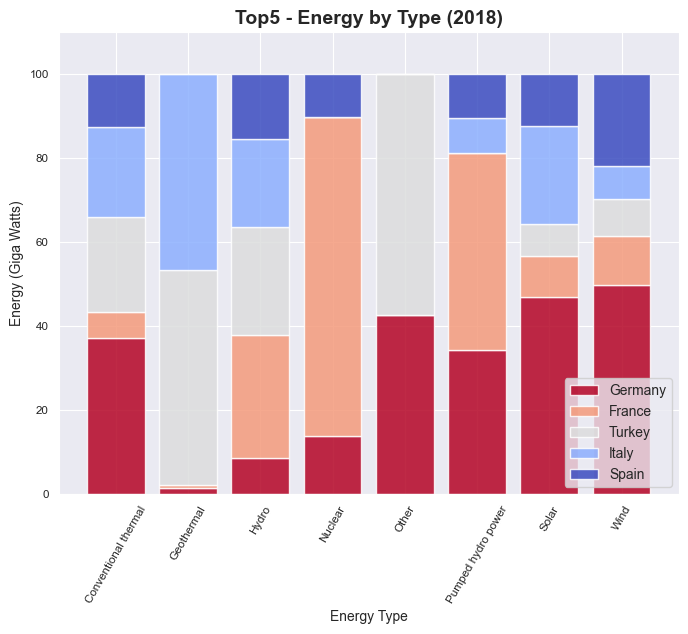

In [133]:
import matplotlib.cm as cm
cmap = cm.coolwarm_r (np.linspace(0, 1, len(top5)))

plt.figure(figsize=(8, 6))

bottom = df[df.country_name == top5[0] ]['2018'].values*0
for k, country in enumerate(top5):
    plt.bar(dftop5[dftop5.country_name == country ]['type'],
            dftop5[dftop5.country_name == country ]['proporcao'] * 100,  alpha=0.85,
            bottom=bottom,
            label=country,
            color=cmap[k])
    bottom = bottom + dftop5[dftop5.country_name == country ]['proporcao'].values * 100

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')
plt.ylim([0,110])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')
plt.legend()

plt.show()

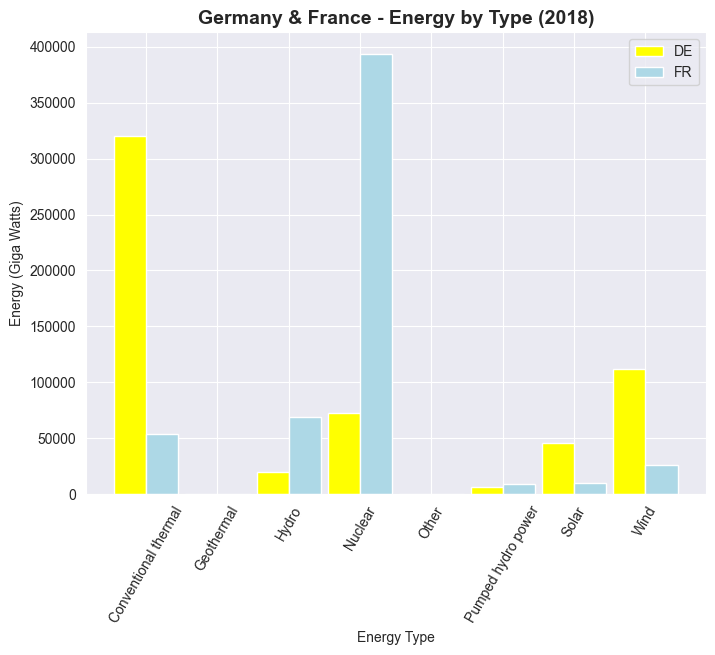

In [125]:
plt.figure(figsize=(8, 6))

ind = np.arange(len(fr['type']))
barwidth = 0.45

plt.bar(ind, de['2018'], barwidth, label='DE', color='yellow')
plt.bar(ind + barwidth, fr['2018'], width=barwidth, label='FR', color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Germany & France - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(ind + barwidth / 2, dftop5['type'].unique(), rotation=60)
plt.legend()
plt.show()

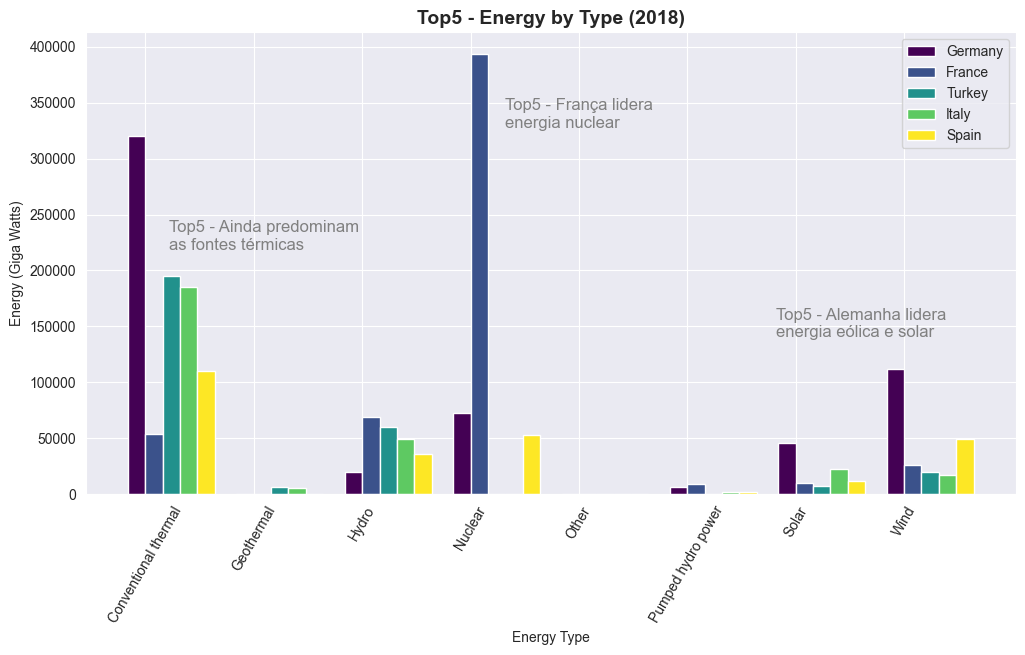

In [127]:
import matplotlib.cm as cm
cmap = cm.viridis(np.linspace(0, 1, len(top5)))

plt.figure(figsize=(12, 6))

ind = np.arange(len(fr['type']))
barwidth = 0.16

for k, country in enumerate(top5):
    plt.bar(ind + barwidth*k,
            dftop5[dftop5.country_name == country ]['2018'] ,
            barwidth,
            label=country, color=cmap[k])

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(ind + barwidth / 2, dftop5['type'].unique(), rotation=60)
plt.legend()

plt.text(ind[0]+0.3, max(dftop5['2018']) /1.8 , 'Top5 - Ainda predominam\nas fontes térmicas', fontsize=12, color='grey')
plt.text(ind[3]+0.4, max(dftop5['2018']) /1.2, 'Top5 - França lidera\nenergia nuclear', fontsize=12, color='grey')
plt.text(ind[5]+0.9, max(dftop5['2018']) /2.8, 'Top5 - Alemanha lidera\nenergia eólica e solar', fontsize=12, color='grey')

plt.show()

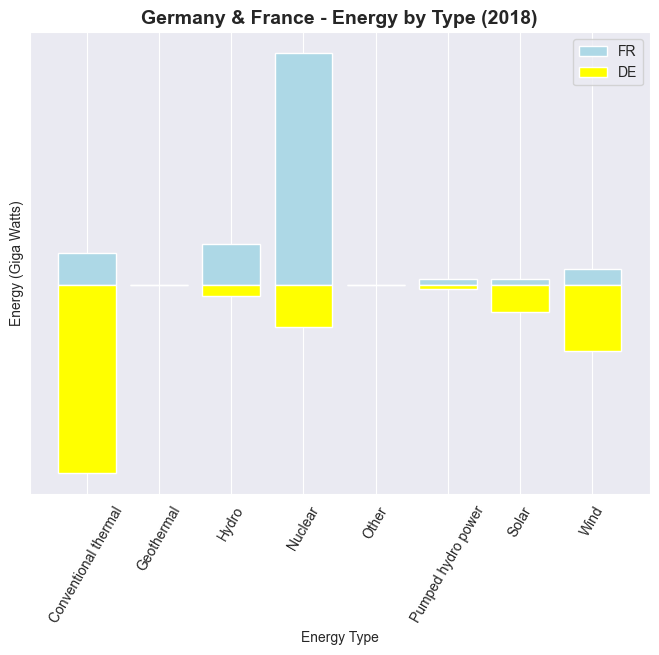

In [128]:
plt.figure(figsize=(8, 6))

plt.bar(fr['type'], fr['2018'], label='FR', color='lightblue')
plt.bar(de['type'], -de['2018'], label='DE', color='yellow')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Germany & France - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(rotation=60)
plt.yticks([])
plt.legend()


plt.show()

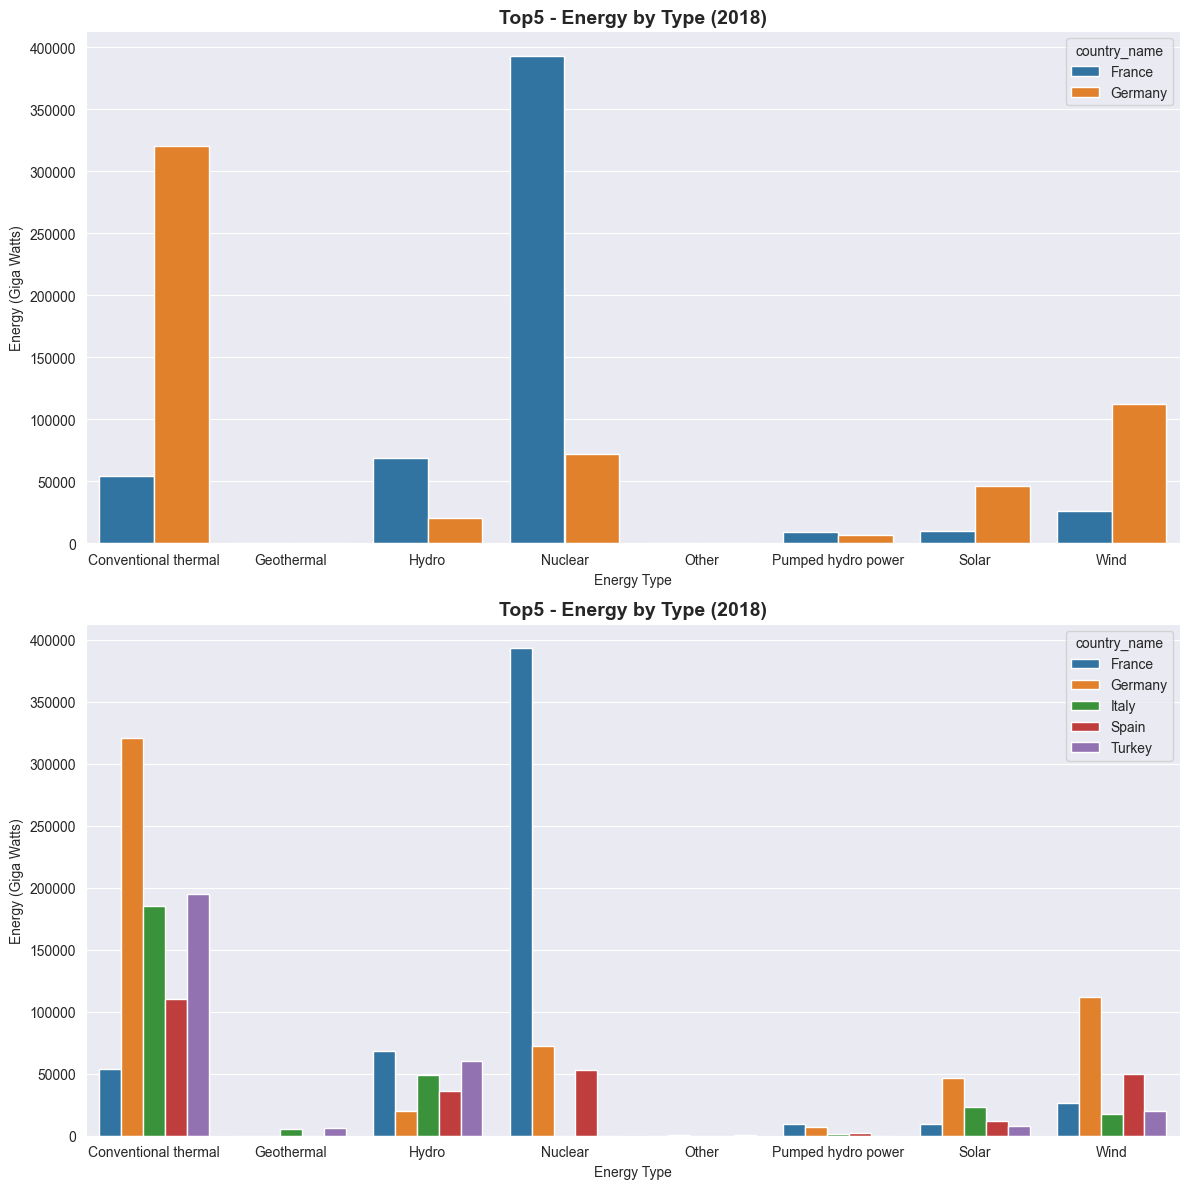

In [134]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(x='type',y='2018',hue='country_name',
            data=dftop5[ dftop5.country.isin(['FR','DE']) ])
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')

plt.subplot(2,1,2)
sns.barplot(x='type',y='2018',hue='country_name',data=dftop5)
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

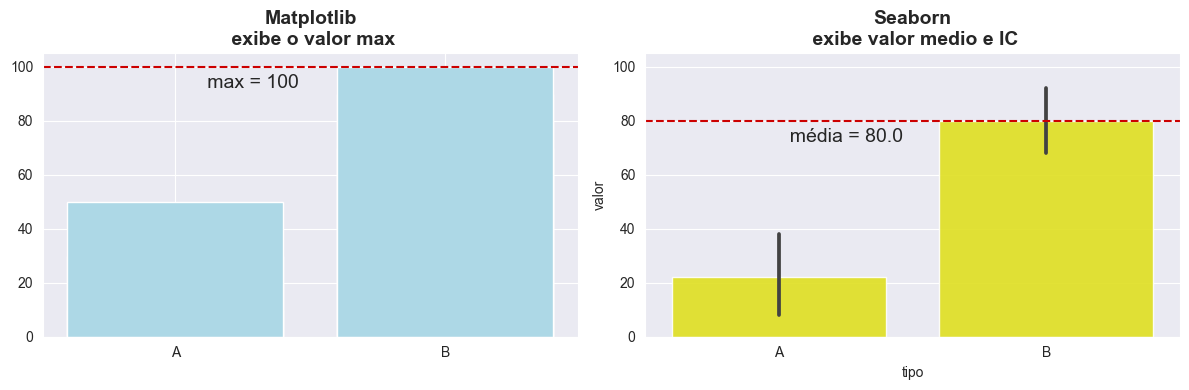

In [137]:
data = pd.DataFrame( { 'tipo': pd.Series(['A','A','A','A','A','B','B','B','B','B']),
                       'valor': pd.Series([0,10,20,30,50,60,70,80,90,100]) })

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='lightblue')

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

C:\Users\Joaov\AppData\Local\Temp\ipykernel_3492\3764831287.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],
C:\Users\Joaov\AppData\Local\Temp\ipykernel_3492\3764831287.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],


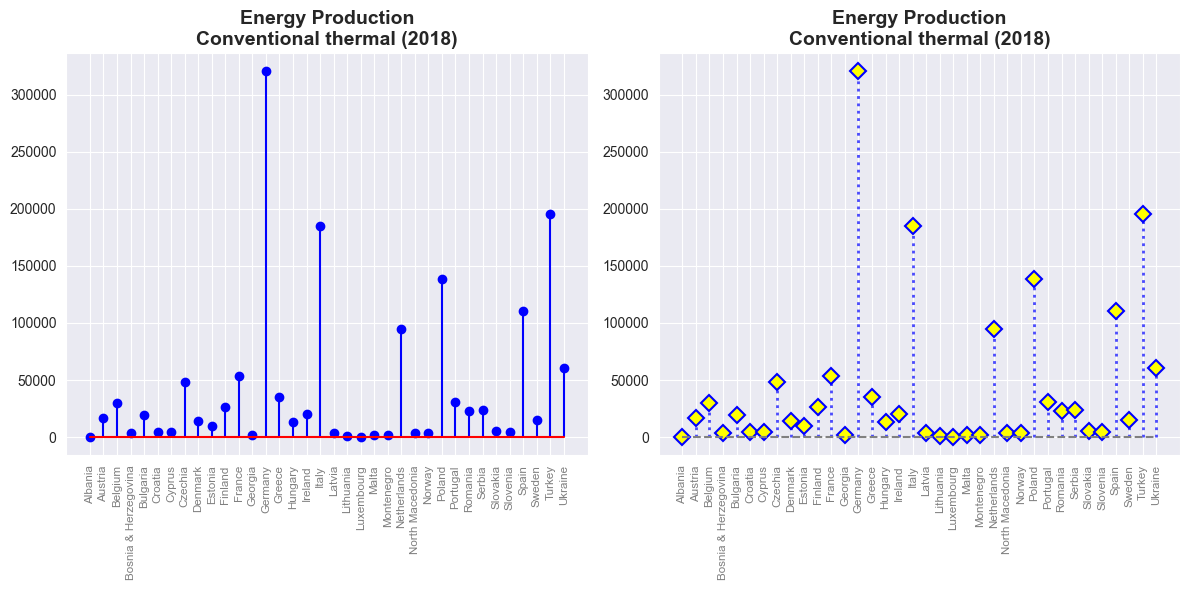

In [140]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],
         df[ df['type'] == 'Conventional thermal']['2018'],
         use_line_collection=True,
         linefmt='b-', markerfmt='bo', basefmt='r-')

plt.xticks(rotation=90, color='grey', fontsize='small')
plt.title("Energy Production\nConventional thermal (2018)", fontsize=14, weight='bold')

plt.subplot(1,2,2)

# change color and shape and size and edges
(markers, stemlines, baseline) = plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],
                                          df[ df['type'] == 'Conventional thermal']['2018'],
                                          use_line_collection=True)
plt.setp(markers, marker='D', markersize=8, markeredgecolor='b', markeredgewidth=1.5, color='yellow')
plt.setp(stemlines, linestyle='dotted' ,lw=2, color='b', alpha=0.7)
plt.setp(baseline, color='grey', linestyle='dashed')
plt.xticks(rotation=90, color='grey', fontsize='small')

plt.title("Energy Production\nConventional thermal (2018)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()




In [141]:
df2 = df.copy()
df2 = pd.concat([df2[ df2.country_name == 'France' ].nlargest(5, columns='2018'),
                 df2[ df2.country_name == 'Germany' ].nlargest(5, columns='2018')])

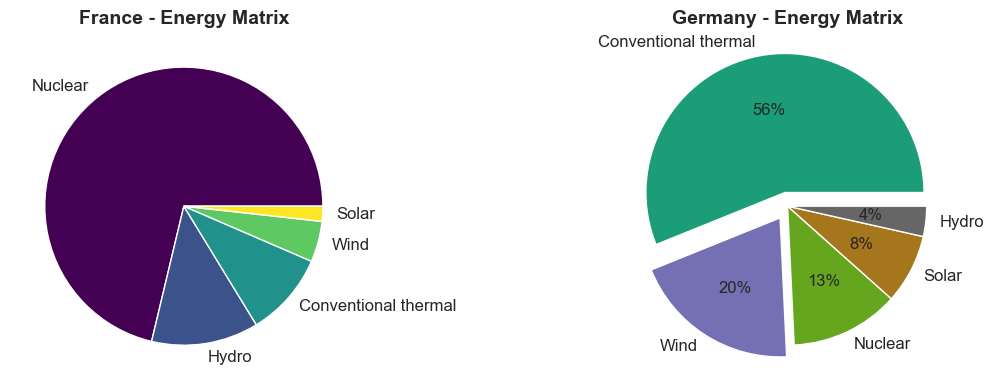

In [144]:
import matplotlib.pyplot as plt
cmap = cm.viridis(np.linspace(0, 1, len(top5)))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.pie(df2[ df2.country_name == 'France' ][ '2018' ], labels=df2[ df2.country_name == 'France' ][ 'type' ], textprops={'size': '12'}, colors=cmap )
plt.title('France - Energy Matrix', fontsize=14 , weight='bold')

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))
plt.pie(df2[ df2.country_name == 'Germany' ][ '2018' ] , labels=df2[ df2.country_name == 'Germany' ][ 'type' ], colors=cmap,
        autopct='%.0f%%',
        textprops={'size': '12'},
        explode=[0.1,0.1,0,0,0])

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')

plt.tight_layout()
plt.show()

O parâmetro autopct é empregado para exibir os valores percentuais no gráfico com a formatação '%.0f%%' indicada. textprops permite alterar as propriedades do texto e são especificadas em formato de um dicionário. O parâmetro explode é bastante útil e permite descatar setores do círculo que desejamos ressaltar. Por exemplo, destacamos no segundo gráfico as duas maiores fontes de energia da Alemanha. Esses recursos, certamente, contribuem para comunicar melhor os dados.

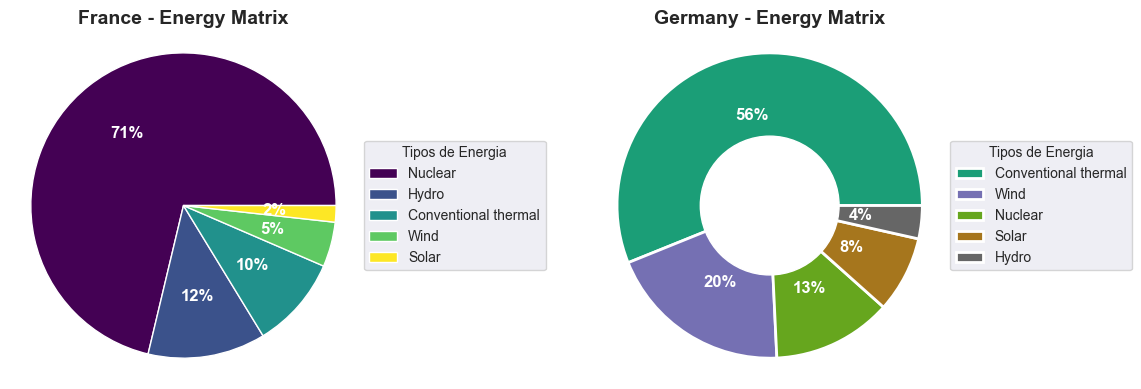

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
cmap = cm.viridis(np.linspace(0, 1, len(top5)))
wedges, texts, _ = plt.pie(df2[ df2.country_name == 'France' ][ '2018' ].replace(0,1) , labels=df2[ df2.country_name == 'France' ][ 'type' ],
                           textprops={'size': '12', 'color':'w', 'weight':'bold'},
                           radius=1.1,
                           autopct='%.0f%%',
                           colors=cmap )
plt.title('France - Energy Matrix', fontsize=14 , weight='bold')

plt.legend(wedges, df2[ df2.country_name == 'France' ][ 'type' ],
           title="Tipos de Energia",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))
wedges, texts, _ = plt.pie(df2[ df2.country_name == 'Germany' ][ '2018' ] , labels=df2[ df2.country_name == 'Germany' ][ 'type' ], colors=cmap,
                           textprops={'size': '12', 'color':'w', 'weight':'bold'},
                           autopct='%.0f%%',
                           radius=1.1,
                           wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')

my_circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('off')

plt.legend(wedges, df2[ df2.country_name == 'Germany' ][ 'type' ],
           title="Tipos de Energia",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [146]:
!pip install squarify

You should consider upgrading via the 'C:\Users\Joaov\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


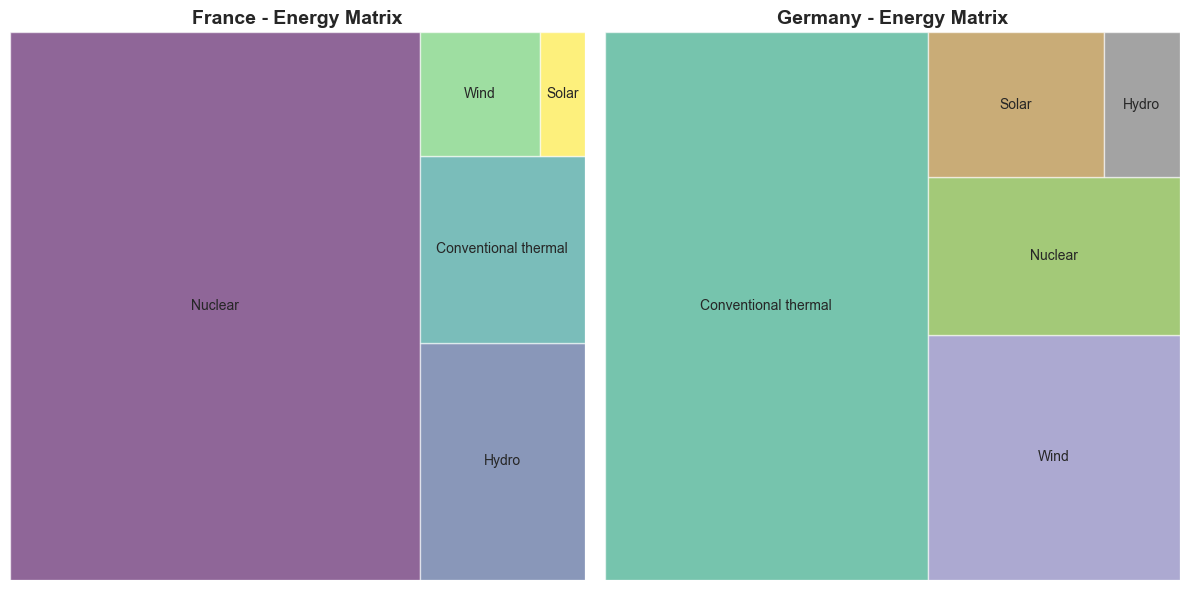

In [147]:
import squarify # pip install squarify (algorithm for treemap)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
cmap = cm.viridis(np.linspace(0, 1, len(df2['type'].unique())))

squarify.plot(sizes= df2[ df2.country_name == 'France' ][ '2018' ].replace(0,1) , label=df2[ df2.country_name == 'France' ][ 'type' ], alpha=.6, color=cmap )

plt.title('France - Energy Matrix', fontsize=14 , weight='bold')
plt.axis('off')

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))

squarify.plot(sizes= df2[ df2.country_name == 'Germany' ][ '2018' ] , label=df2[ df2.country_name == 'Germany' ][ 'type' ], alpha=.6, color=cmap )

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

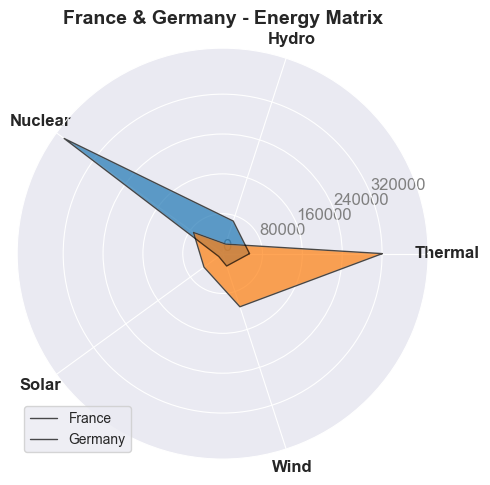

In [148]:
from math import pi

df2 = df2.sort_values('type')
df2['type'].replace('Conventional thermal','Thermal',inplace=True)
categories = df2['type'].unique().tolist()

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(5,5))
plt.subplot(1,1,1, polar=True)

for country in df2['country_name'].unique():

    plt.xticks(angles[:-1], categories, size=12, weight='bold')
    plt.yticks(np.arange(0,max(df2['2018']), 80000), size=12, color='grey')
    val_c1 = df2[ df2['country_name'] == country ]['2018'].tolist()
    val_c1 += val_c1[:1] # repeat the first value to close the circular graph
    plt.plot(angles, val_c1, linewidth=1, label=country, color='k', alpha=0.7)
    plt.fill(angles, val_c1, alpha=0.7)
    plt.title('France & Germany - Energy Matrix', fontsize=14 , weight='bold')

    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

C:\Users\Joaov\AppData\Local\Temp\ipykernel_3492\3109500421.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = pd.DataFrame( df2[df2.country == 'DE'].groupby('type').sum() ).reset_index()


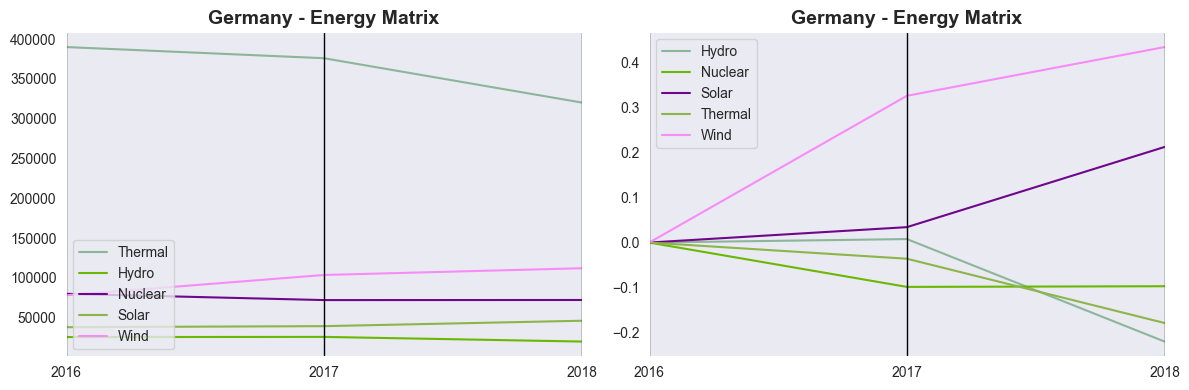

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
pd.plotting.parallel_coordinates(df2[df2.country == 'DE'][['type','2016','2017','2018']], 'type')
plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')
plt.legend(loc='lower left')

plt.subplot(1,2,2)
df3 = pd.DataFrame( df2[df2.country == 'DE'].groupby('type').sum() ).reset_index()
df3['2017'] = df3['2017'] / df3['2016'] - 1
df3['2018'] = df3['2018'] / df3['2016'] - 1
df3['2016'] = df3['2016'] / df3['2016'] - 1

pd.plotting.parallel_coordinates(df3, 'type')

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
!pip install Waffle
!pip install pywaffle

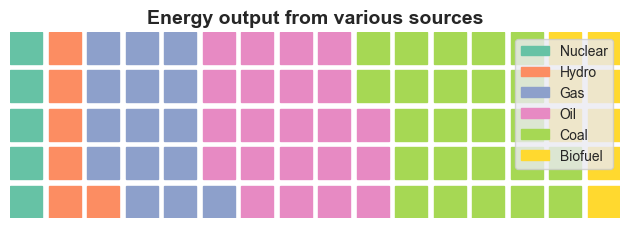

In [151]:
from pywaffle import Waffle

data = pd.DataFrame({'energy_type' : ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel'],
                     'energy' : [5, 6, 15, 22, 24, 8]})

fig = plt.figure(FigureClass = Waffle,
                 rows = 5,
                 values = data.energy,
                 labels = list(data.energy_type))

plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()